### What is Cryptocurrency?



Cryptocurrency is a digital payment system that doesn't rely on banks or a central adminsteration to verify transactions. It is a peer-to-peer system that can enable anyone anywhere to send and receive payments. Instead of being physical money carried around and exchanged in the real world, cryptocurrency payments exist purely as digital entries to an online database describing specific transactions and, the transactions are recorded in a public ledger. Cryptocurrency is stored in digital wallets.

Cryptocurrency received its name because it uses encryption to verify transactions. This means advanced coding is involved in storing and transmitting cryptocurrency data between wallets and to public ledgers. The aim of encryption is to provide security and safety.

The first cryptocurrency was Bitcoin, which was founded in 2009 and remains the best known today.

In [3]:
# Importing pandas
import pandas as pd

# Importing matplotlib
import matplotlib.pyplot as plt

# Reading in current data from coinmarketcap.com
current = pd.read_csv("coinmarket.csv")

# Printing out the first few lines
current.head()

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


### What is Market Capitalisation with respect to Cryptocurrency?


Within the blockchain industry, the term market capitalization (or market cap) refers to a metric that measures the relative size of a cryptocurrency. It is calculated by multiplying the current market price of a particular coin or token with the total number of coins in circulation.<br>
<b> Market Cap = Current Price x Circulating Supply</b>


For example,<br>
If each unit of a cryptocurrency is being traded at 10.00 dollars, and the circulating supply is equal to 80,000,000 coins, the <b>market capitalization for this cryptocurrency would be 800,000,000 dollars(10 x 80,000,000)<b>

Here, we do not require cryptocurrencies with no market cap, and they have no value for our analysis, and hence filtered out


In [4]:
# Selecting the 'id' and the 'market_cap_usd' columns
market_cap_raw = current[['id', 'market_cap_usd']]

# Counting the number of values
market_cap_raw.count()

id                1326
market_cap_usd    1031
dtype: int64

In [5]:
# Filtering out rows without a market capitalization
cap = market_cap_raw.query('market_cap_usd > 0')

# Counting the number of values again
cap.count()

id                1031
market_cap_usd    1031
dtype: int64

### Comparing Bitcoin to rest of the cryptocurrencies

Text(0, 0.5, 'Percentage of total cap')

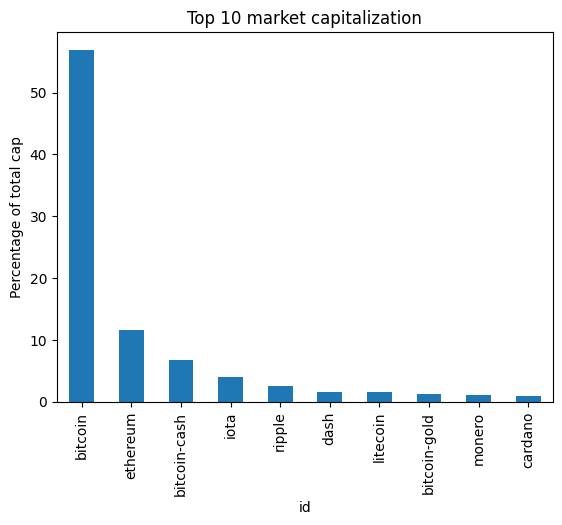

In [6]:
# Selecting the first 10 rows and setting the index
cap10 = cap.head(10).set_index("id")

# Calculating market_cap_perc
cap10 = cap10.assign(market_cap_perc = lambda x: (x.market_cap_usd/cap.market_cap_usd.sum()) * 100)

# Plotting the barplot with the title defined above 
ax = cap10.market_cap_perc.head(10).plot.bar(title= 'Top 10 market capitalization')

# Annotating the y axis with the label defined above
ax.set_ylabel('Percentage of total cap')

As we can see from the data above,  Bitcoin is at the top spot when it comes to overall market capitalization
Bitcoin currently captures around 60% of the cryptocurrency market. Ethereum comes in second, making up almost 12% of total market cap

This means that as per the data, Bitcoin’s market cap is greater than all other crypocurrencies combined

### Exploring Volatitlity of Cryptocurrencies over 1hour and 7day time periods



In [15]:
# Selecting the id, percent_change_1h and percent_change_24h columns
volatility = current[['id', 'percent_change_1h','percent_change_24h', 'percent_change_7d',]]

# Setting the index to 'id' and dropping all NaN rows
volatility = volatility.set_index('id').dropna()

# Sorting the DataFrame by percent_change_1h in ascending order
volatility = volatility.sort_values('percent_change_1h', ascending = True)

# Checking the rows
volatility

,percent_change_1h,percent_change_24h,percent_change_7d
id,,,
force,-70.85,-15.05,283.37
bitok,-62.80,-74.37,-71.67
wyvern,-49.43,6.31,23.14
halloween-coin,-47.13,6.27,-29.79
cagecoin,-39.38,-36.26,-92.68
...,...,...,...
peacecoin,90.72,17.61,145.43
rhfcoin,101.08,18.12,24.39
britcoin,111.38,223.31,272.18


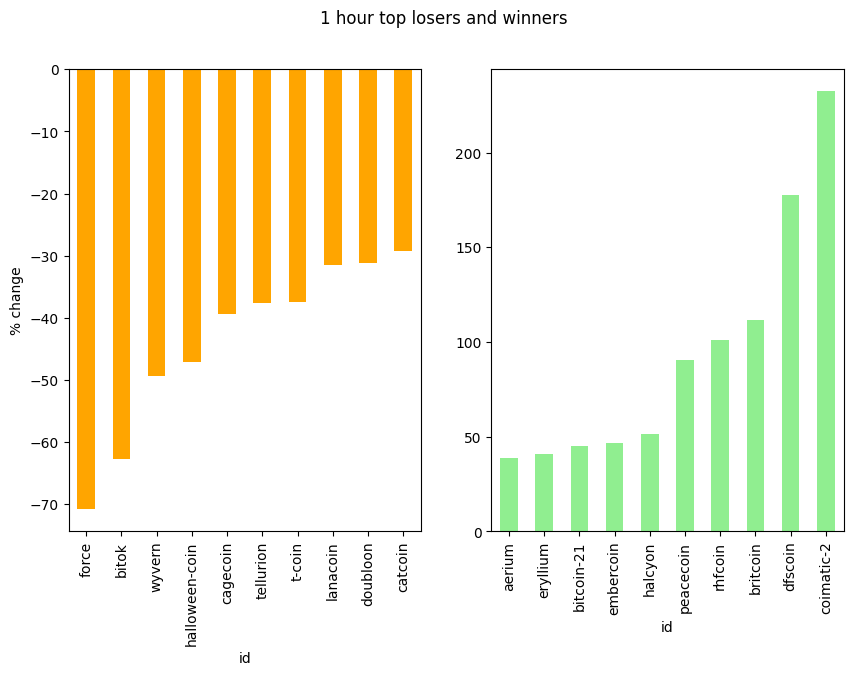

In [9]:
#Defining a function with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series, title):
    # Making the subplot and the figure for two side by side plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))    
    # Plotting with pandas the barchart for the top 10 losers
    ax = (volatility_series[:10].plot.bar(color = 'orange', ax = axes[0]))   
    # Setting the figure's main title to the text passed as parameter
    fig.suptitle(title)
    # Setting the ylabel to '% change'
    ax.set_ylabel('% change')
    # Same as above, but for the top 10 winners
    ax = (volatility_series[-10:].plot.bar(color = 'lightgreen', ax = axes[1]))  
    # Returning this for good practice, might use later
    return fig, ax

DTITLE = "1 hour top losers and winners"

# Calling the function above with the 24 hours period series and title DTITLE  
fig, ax = top10_subplot(volatility.percent_change_1h, DTITLE)

As we can observe here, the cryptocurrency FORCE has had about -70% change in the span of 1hr
and the cyprocurrency COINMATIC-2 has had about 225% increase in just 1hr



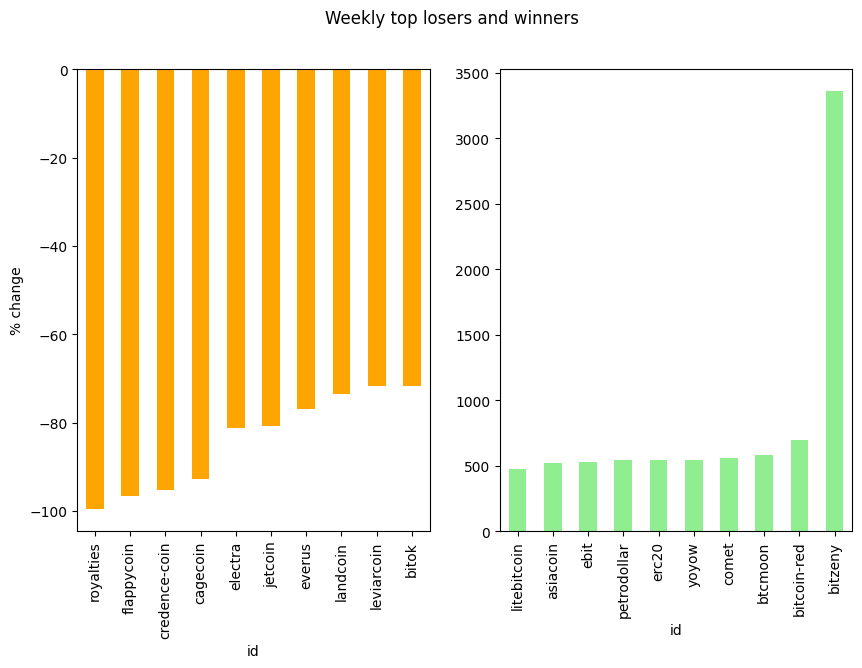

In [14]:
# Sorting in ascending order
volatility7d = volatility.sort_values('percent_change_7d', ascending = True)

WTITLE = "Weekly top losers and winners"

# Calling the top10_subplot function
fig, ax = top10_subplot(volatility7d.percent_change_7d, WTITLE)

This shows that cyprocurrencies are highly volatile. Cryptocurrency volatility plays a crucial role in an investor’s decision-making process. They use this characteristic to analyze risks and determine the possible gains or losses that may occur when purchasing a coin or token.

Many existing cryptocurrencies are very volatile by nature. There are several reasons for this. Firstly, cryptocurrencies are largely unregulated, have no central authority, and possess little to no barrier to entry. Furthermore, the cryptocurrency market is still relatively new and undergoing development daily.

### What does Large cap, Mid cap and Small cap mean in cryptocurrency?


#### Large cap cryptocurrencies
Large cap cryptocurrencies are coins that have a market capitalization more than 10 Billion USD. These projects have a long term proven track record, strong security and they are the major players in the cryptocurrency space.

#### Mid cap crypocurrencies
Mid cap coins and tokens generally have a market capitalization anywhere between 1 Billion USD to 10 Billion USD. These projects are well established, expanding and may expected to experience rapid growth in the near future. Some of the popular coins and tokens that fall under this category are Ripple, Dash,  Litecoin, Monero and Bitcoin Gold

#### Small cap crptocurrencies
Coins and tokens that have a market cap less than 1 Billion USD and more than 100 million USD are classified into small caps. These projects don’t have much track record and they don’t have much resources compared to top projects. Due to their age and size they carry higher risk than large and mid cap coins. Most of the low cap coins tend to fail but at the same time if researched properly you can find a gem with great growth potential.

In [11]:
# Selecting everything bigger than 10 billion 
largecaps = cap.query('market_cap_usd > 10000000000')

# Printing out largecaps
largecaps

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10


In [20]:
# Selecting everything lesser than 10billion but greater than 1 billion
#midcaps = cap.query('market_cap_usd < 10000000000' and 'market_cap_usd > 1000000000' )
midcaps = cap.query('market_cap_usd > 1000000000' and 'market_cap_usd < 10000000000' )
# Printing out midcaps
midcaps

,id,market_cap_usd
4,ripple,9.365343e+09
5,dash,5.794076e+09
6,litecoin,5.634498e+09
7,bitcoin-gold,4.920065e+09
8,monero,4.331688e+09
...,...,...
1026,future-digital-currency,2.510000e+02
1027,environ,1.360000e+02
1028,caliphcoin,1.000000e+02
1029,falcoin,2.300000e+01


In [22]:
# Selecting everything bigger than 100 million and lesser than 1 billion
#smallcaps = cap.query('market_cap_usd < 1000000000' and 'market_cap_usd > 100000000' )
smallcaps = cap.query('market_cap_usd > 100000000' and 'market_cap_usd < 100000000' )
# Printing out smallcaps
smallcaps

,id,market_cap_usd
88,yoyow,99842099.0
89,potcoin,98917924.0
90,nexus,98455326.0
91,skycoin,93767400.0
92,metaverse,93117040.0
...,...,...
1026,future-digital-currency,251.0
1027,environ,136.0
1028,caliphcoin,100.0
1029,falcoin,23.0
